In [ ]:
# IMPORT REQUIRED LIBRARIES

import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder



In [ ]:
df = pd.read_csv("/content/insurance.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

ct = make_column_transformer(

      (MinMaxScaler(),["age","bmi","children"]),
      (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

x = df.drop("expenses",axis = 1)
y = df["expenses"]


In [ ]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
                                                    x,
                                                    y,
                                                    test_size =0.2,
                                                    random_state = 42
)

In [ ]:
# filt column transformer on training data only (doing so on test data would result in data leakage)
ct.fit(x_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [ ]:
# transform trainng and test data with normalisation (minmax sacler) and one hot encoding

x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [ ]:
x_train_normal[0]

array([0.60869565, 0.10781671, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
x_test_normal[0]

array([0.58695652, 0.24797844, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [ ]:
# create a new model

model = tf.keras.Sequential([

                              tf.keras.layers.Dense(64),
                              tf.keras.layers.Dense(32),
                              tf.keras.layers.Dense(1)
])

model.compile(
              loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"]
)

history = model.fit(x_train_normal,y_train,epochs = 100,verbose = 1)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13344.1299 - mae: 13344.1299
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.8828 - mae: 13333.8828
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13303.0312 - mae: 13303.0312
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13231.2344 - mae: 13231.2344
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13096.1846 - mae: 13096.1846
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12875.3174 - mae: 12875.3174
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12546.6504 - mae: 12546.6504
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12089.6035 - mae: 12089.6035
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 11504.9551 - mae: 11504.9551
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 10859.79

Text(0.5, 0, 'epochs')

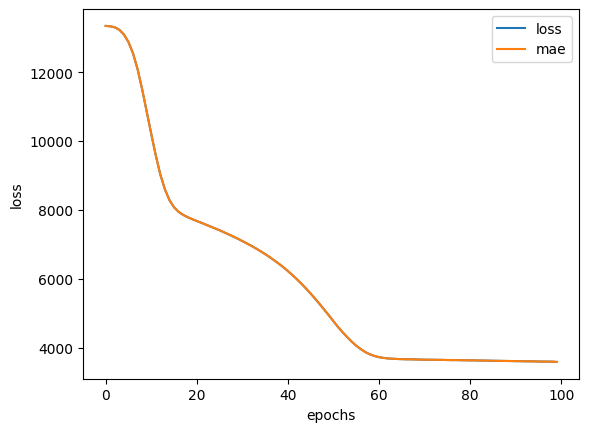

In [ ]:
# loss curve

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
"""

this is one of the benefit of normalization : faster convergence time

"""

In [ ]:
y_pred = model.predict(x_test_normal)

9/9 [==============================] - 0s 6ms/step


## Mean Squared Error

In [ ]:
mse = tf.keras.losses.MeanSquaredError()
mse(y_test,y_pred).numpy()

264839380.0

## Means Squared logarithmic error

In [ ]:
msle = tf.keras.losses.MeanSquaredLogarithmicError()
msle(y_test,y_pred).numpy()

1.9454366

In [ ]:
np.log(1)

0.0

In [ ]:
np.log(1000)

6.907755278982137

In [ ]:
np.log(10000)

9.210340371976184

## Huber loss

In [ ]:
h = tf.keras.losses.Huber()
h(y_test,y_pred).numpy()

11766.53

In [ ]:
""""
distt normal std
not norml  min max scaler
""""